In [1]:
from pandas import *
from matplotlib.pyplot import *
from seaborn import *
from sklearn.metrics import f1_score,accuracy_score,precision_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

In [2]:
data = read_csv(r"C:\Users\FAISAL-PC\Downloads\AmesHousing.csv")
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data.isnull()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,False,False,True,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [8]:
data['Bldg Type'].value_counts()

Bldg Type
1Fam      2425
TwnhsE     233
Duplex     109
Twnhs      101
2fmCon      62
Name: count, dtype: int64

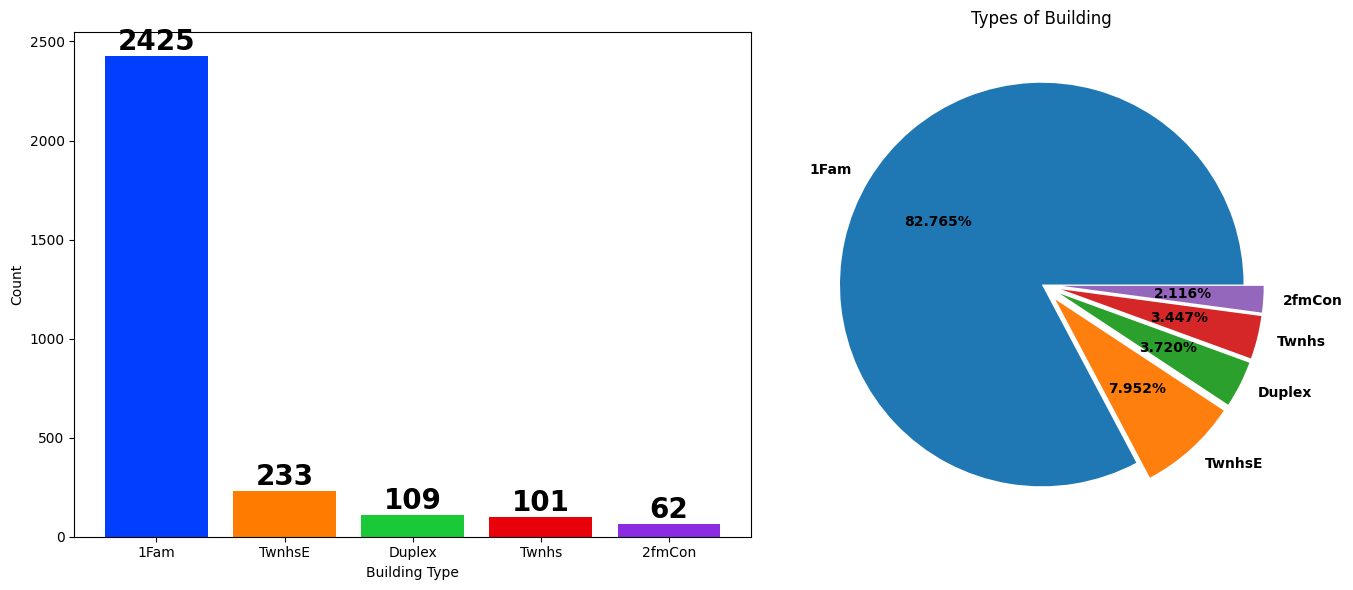

In [9]:
figure(figsize=(14,6))
subplot(1,2,1)
count = data['Bldg Type'].value_counts()
bars = bar(count.index,count.values,color=color_palette('bright'))
bar_label(bars,fontweight='bold',fontsize=20)
xlabel('Building Type')
ylabel('Count')
tight_layout()

subplot(1,2,2)
pie(count,labels=count.index,autopct='%1.3f%%',startangle=0,explode=tuple([0]+[0.1]*(len(count)-1)),textprops={'fontweight':'bold','fontsize':10})
title('Types of Building')
tight_layout()
show()

In [10]:
data['Bsmt Cond'].value_counts()

Bsmt Cond
TA    2616
Gd     122
Fa     104
Po       5
Ex       3
Name: count, dtype: int64

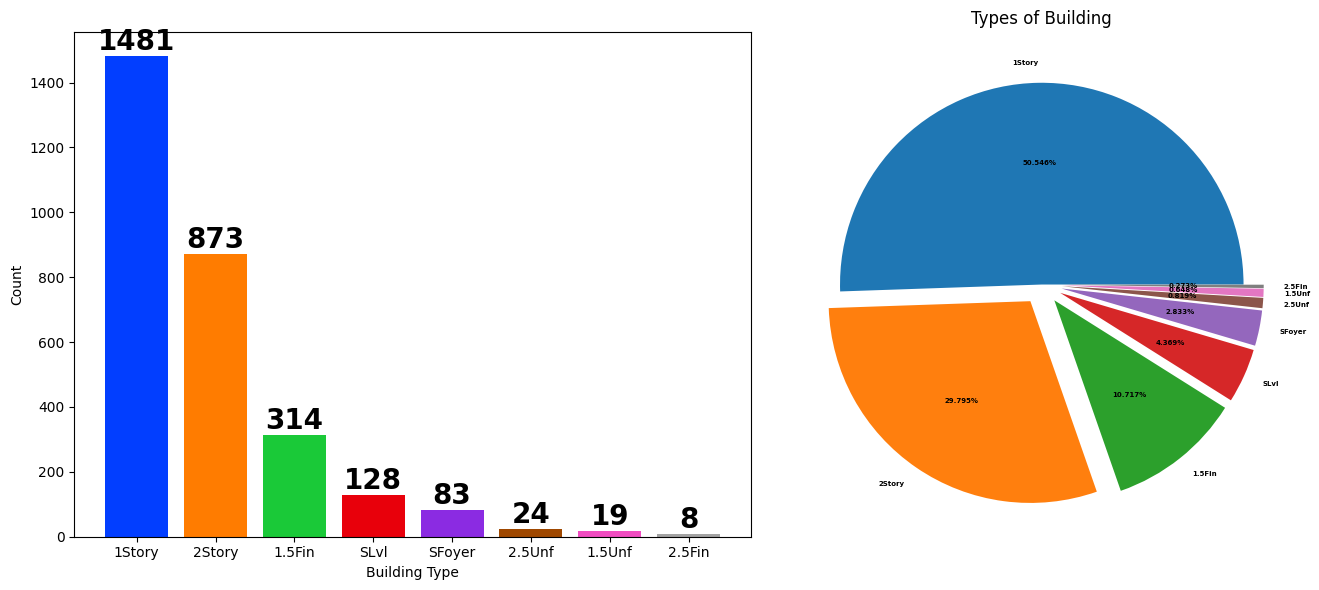

In [30]:
figure(figsize=(14,6))
subplot(1,2,1)
count = data['House Style'].value_counts()
bars = bar(count.index,count.values,color=color_palette('bright'))
bar_label(bars,fontweight='bold',fontsize=20)
xlabel('Building Type')
ylabel('Count')
tight_layout()

subplot(1,2,2)
pie(count,labels=count.index,autopct='%1.3f%%',startangle=0,explode=tuple([0]+[0.1]*(len(count)-1)),textprops={'fontweight':'bold','fontsize':5})
title('Types of Building')
tight_layout()
show()

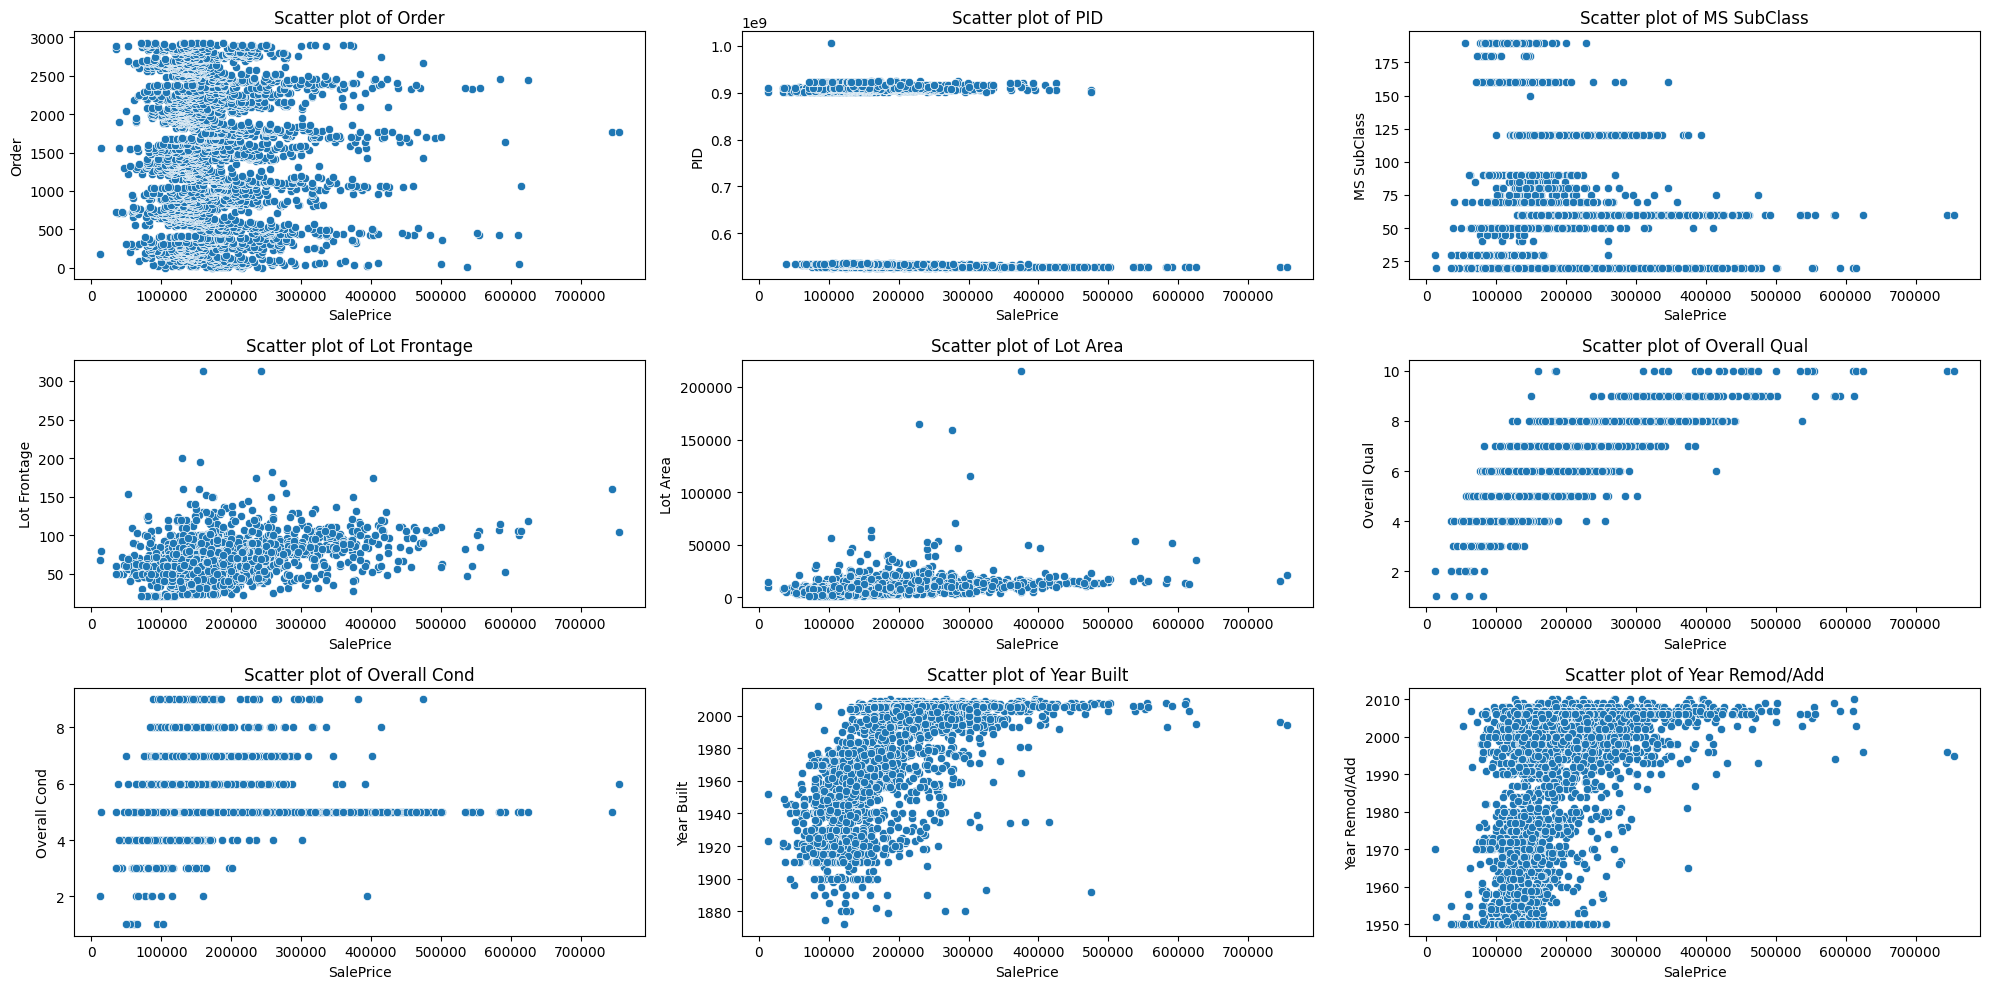

In [11]:
cols = data.select_dtypes(include=['int64','float64']).columns
cols = cols.drop('SalePrice')
figure(figsize=(20,10))
for i,col in enumerate(cols[:9],1):
    subplot(3,3,i)
    scatterplot(x='SalePrice',y=col,data=data)
    title(f'Scatter plot of {col}')
tight_layout()
show()

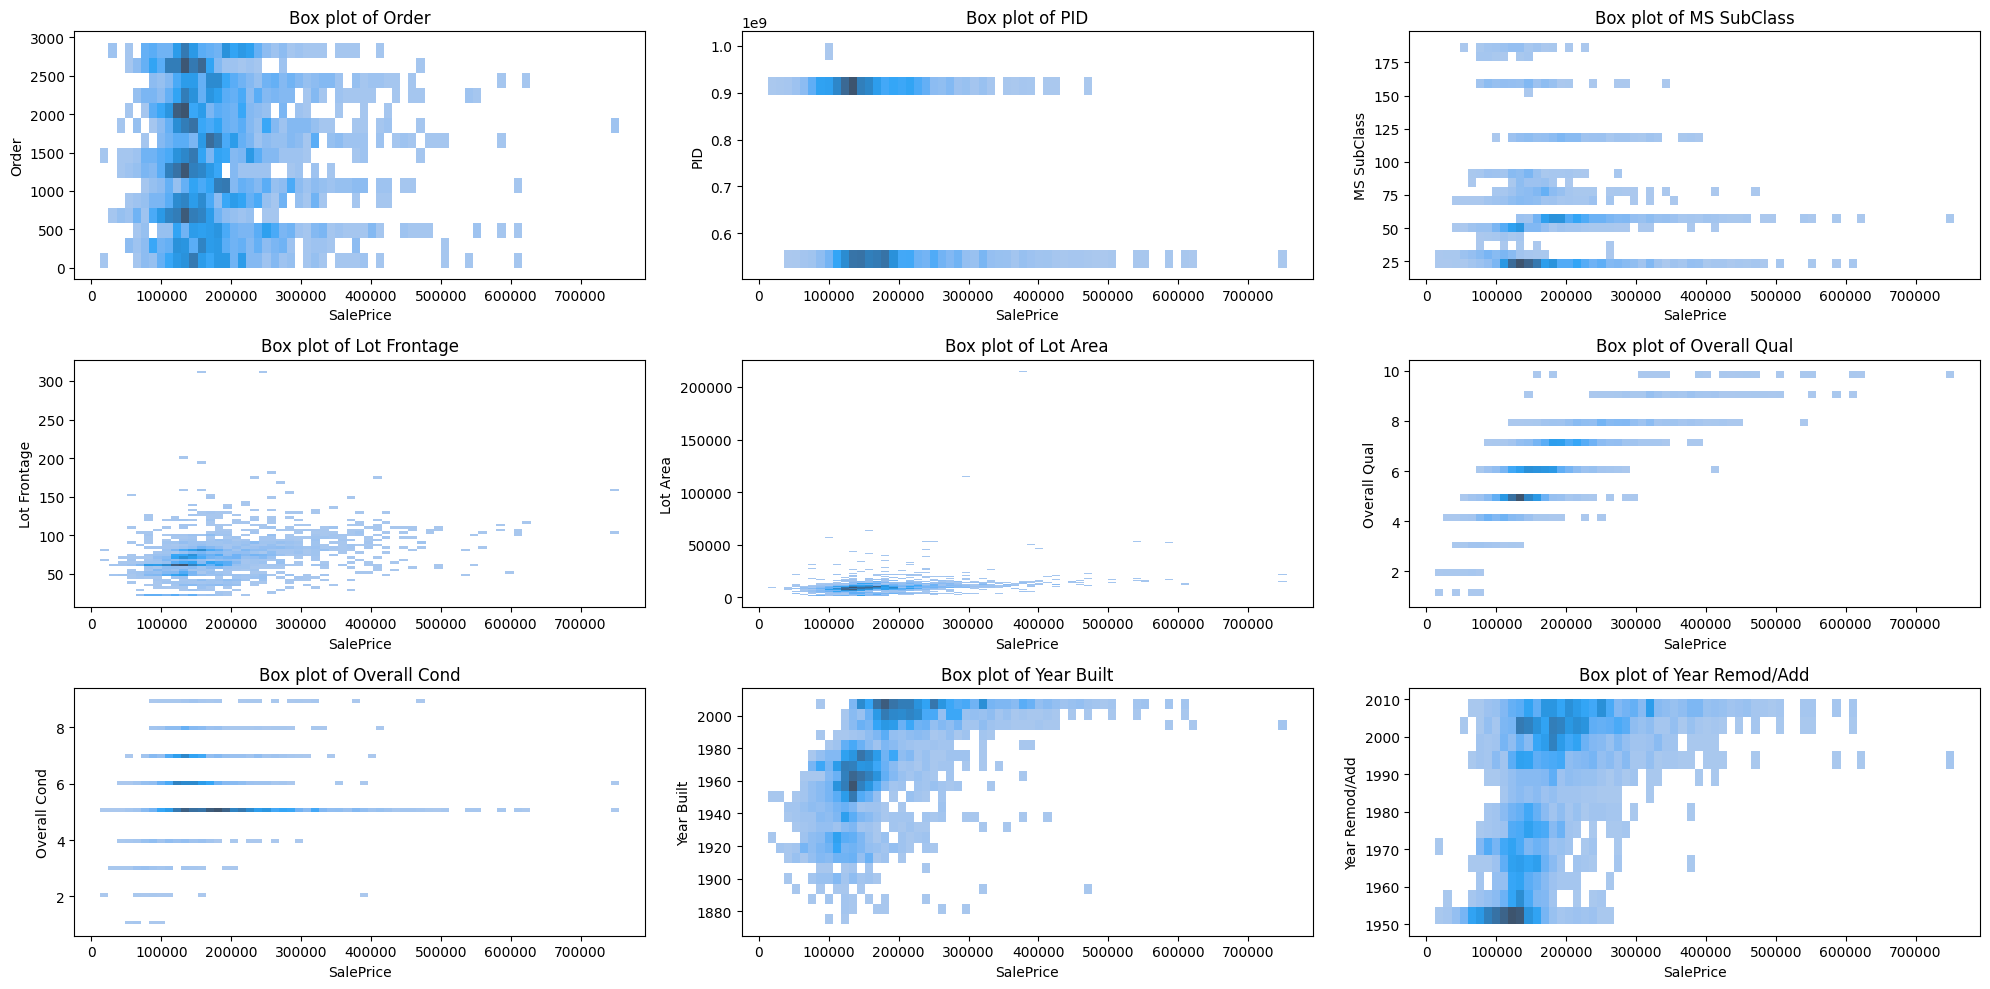

In [14]:
cols = data.select_dtypes(include=['int64','float64']).columns
cols = cols.drop('SalePrice')
figure(figsize=(20,10))
for i ,col in enumerate(cols[:9],1):
    subplot(3,3,i)
    histplot(x='SalePrice',y=col,data=data)
    title(f'Box plot of {col}')
tight_layout()
show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [25]:
from sklearn.pipeline import Pipeline
data = data.copy()
X = data.drop(columns=['SalePrice','PID','Order'],axis=1,errors='ignore')
y = data['SalePrice']
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.3)

num_transform = Pipeline(steps=[
    ('Inmputer',SimpleImputer(strategy='median')),
    ('Scaler',RobustScaler())
])
cat_transform = Pipeline(steps=[
    ('Imputer',SimpleImputer(strategy='most_frequent')),
    ('Encoder',OneHotEncoder(handle_unknown='ignore'))
])
prepro = ColumnTransformer(transformers=[
    ('num',num_transform,num_features),
    ('cat',cat_transform,cat_features)
])


In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,mean_absolute_percentage_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
def train_test_model(classifier,name,X_train,X_test,y_train,y_test):
    model = Pipeline(steps=[
        ('prepro',prepro),
        ('classifier',classifier)
    ])
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(f'{name} Score: {model.score(X_test,y_test):.4f}')
    print(f'Mean Absolute Error:{mean_absolute_error(y_test,y_pred):.4f}')
    print(f'Mean square Error:{mean_squared_error(y_test,y_pred):.4f}')
    print(f'Mean Absolute Percentage Error:{mean_absolute_percentage_error(y_test,y_pred):.4f}')

models = {
    "Random Forest":RandomForestRegressor(criterion='absolute_error',random_state=42,n_estimators=100,min_samples_leaf=15,max_depth=30,max_features='sqrt'),
    "State Vector":SVR(C=0.1,kernel='linear',gamma='scale'),
    "XGB Regressor":XGBRegressor(use_label_encoder=True, eval_metric="rmse", random_state=42),
    "Linear Regression":LinearRegression(fit_intercept=True,n_jobs=100,positive=False),
    "Gradient Boost":GradientBoostingRegressor(n_estimators=100,random_state=42,max_depth=20,min_samples_leaf=10)
}
for name,model in models.items():
    train_test_model(model,name,X_train,X_test,y_train,y_test)
    print('---------------------------------------------------------------------------------------------')

Random Forest Score: 0.8275
Mean Absolute Error:20488.7453
Mean square Error:1212356815.2366
Mean Absolute Percentage Error:0.1179
---------------------------------------------------------------------------------------------
State Vector Score: -0.0530
Mean Absolute Error:59112.6669
Mean square Error:7402086086.5902
Mean Absolute Percentage Error:0.3181
---------------------------------------------------------------------------------------------


c:\Users\FAISAL-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Regressor Score: 0.9125
Mean Absolute Error:15454.8555
Mean square Error:615227264.0000
Mean Absolute Percentage Error:0.0881
---------------------------------------------------------------------------------------------
Linear Regression Score: 0.8967
Mean Absolute Error:15657.3925
Mean square Error:726033389.2188
Mean Absolute Percentage Error:0.0943
---------------------------------------------------------------------------------------------
Gradient Boost Score: 0.9078
Mean Absolute Error:15262.3414
Mean square Error:647886522.9572
Mean Absolute Percentage Error:0.0858
---------------------------------------------------------------------------------------------
